---
Some useful $\LaTeX$ commands are defined in this cell:
$$
\newcommand{\abs}[1]{\left\lvert#1\right\rvert}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\set}[1]{\left\{#1\right\}}
\newcommand{\paren}[1]{\left(#1\right)}
\newcommand{\brack}[1]{\left[#1\right]}
\newcommand{\ip}[2]{\left\langle#1,#2\right\rangle}
\DeclareMathOperator{\span}{span}
\DeclareMathOperator{\fl}{fl}
\abs{x}, \norm{x}, \set{x}, \paren{x}, \brack{x}, \ip{x}{y}, \span, \fl
$$

---

---
# 16.2 Euler's method
---

We will now derive methods to approximate the function $y(t)$ that solves the initial value problem

$$ \frac{dy}{dt} = f(t, y), \quad a \leq t \leq b, \quad y(a) = c $$

at evenly spaced points $a = t_0 < t_1 < \cdots < t_N = b$, where 

$$h = \frac{b - a}{N}, \quad t_i = a + ih, \quad i = 0, 1, \ldots, N.$$

We will compute $y_i$ such that $y_i \approx y(t_i)$, for all $i$.

---

## Forward Euler method

Consider the Taylor series

$$
y(t_i + h) = y(t_i) + h y'(t_i) + \frac{h^2}{2} y''(\xi_i), \quad \xi_i \in (t_i, t_i + h).
$$

Since $y'(t) = f(t, y(t))$ and $t_{i+1} = t_i + h$, we have

$$
y(t_{i+1}) \approx y(t_i) + h f(t_i, y(t_i)).
$$


Therefore, we define

$$
\begin{align}
y_0 &= c \\
y_{i+1} &= y_i + h f(t_i, y_i), \quad i = 0, 1, \ldots, N-1.\\
\end{align}
$$

This is the **forward Euler method**.

---

## Example

Consider the initial value problem

$$\frac{dy}{dt} = -5y + 5t^2 + 2t, \quad 0 \leq t \leq 1, \quad y(0) = 1.$$

The solution of this problem is $y(t) = t^2 + e^{-5t}$. Approximate this solution using the forward Euler method.

In [1]:
f(t, y) = -5y + 5t^2 + 2t
a, b = 0.0, 1.0
y0 = 1.0

1.0

In [2]:
function euler(f, a, b, y0, N)
    
    h = (b - a)/N

    tt = range(a, b, length=N+1)
    yy = zeros(N+1)
    yy[1] = y0

    for i = 1:N
        yy[i+1] = yy[i] + h*f(tt[i], yy[i])
    end
    
    return tt, yy
end

euler (generic function with 1 method)

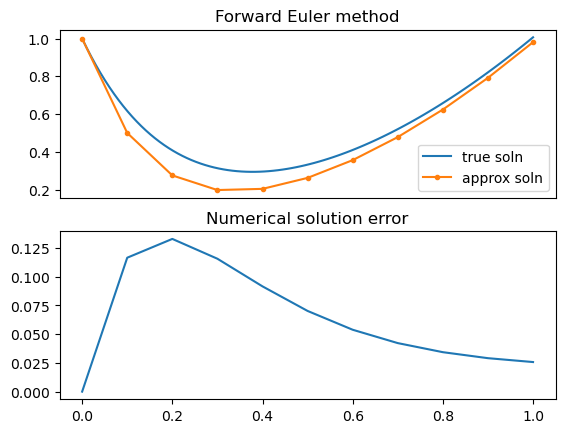

In [3]:
using PyPlot

# Numerically solve the ODE using the 
# forward Euler method
tout, yy = euler(f, a, b, y0, 10)

# Compute the exact solution
y(t) = t^2 + exp(-5t)
ytrue = y.(tout)

# Compute the absolute error
abserr = abs.(yy - ytrue)

tt = range(a, b, length=100)

subplot(2, 1, 1)
plot(tt, y.(tt), label="true soln")
plot(tout, yy, ".-", label="approx soln")
xticks([])
title("Forward Euler method")
legend()

subplot(2, 1, 2)
plot(tout, abserr)
title("Numerical solution error");

---

## Backward Euler method

Consider the Taylor series

$$
y(t_i) = y(t_{i+1} - h) = y(t_{i+1}) - h y'(t_{i+1}) + \frac{h^2}{2} y''(\xi_i), \quad \xi_i \in (t_{i+1} - h, t_{i+1}).
$$

Thus, we have

$$
y(t_i) \approx y(t_{i+1}) - h f(t_{i+1}, y(t_{i+1})),
$$

which implies

$$
y(t_{i+1}) \approx y(t_i) + h f(t_{i+1}, y(t_{i+1})).
$$

Therefore, we define

$$
\begin{align}
y_0 &= c\\
y_{i+1} &= y_i + h f(t_{i+1}, y_{i+1}), \quad i = 0, 1, \ldots, N-1,\\
\end{align}
$$

which is the **backward Euler method**.


We say that the forward Euler method is an **explicit method** since $y_{i+1}$ is defined explicitly in terms of $y_i$:

$$
y_{i+1} = y_i + hf(t_i, y_i).
$$

However, in the backward Euler method, $y_{i+1}$ is defined implicitly it terms of $y_i$ and itself,

$$
y_{i+1} = y_i + hf(t_{i+1},y_{i+1}),
$$

so we say that it is an **implicit method**. 

To implement an implicit method, we need to solve a (possibly nonlinear) equation for $y_{i+1}$ using Chapter 3 methods, for example.

---

## Example

Consider the initial value problem

$$\frac{dy}{dt} = -5y + 5t^2 + 2t, \quad 0 \leq t \leq 1, \quad y(0) = 1.$$

The solution of this problem is $y(t) = t^2 + e^{-5t}$. Approximate this solution using the forward Euler method.

$$
y_{i+1} = y_i + h f(t_{i+1}, y_{i+1})
$$

$$
y_{i+1} = y_i + h \big( -5y_{i+1} + 5t_{i+1}^2 + 2t_{i+1}\big)
$$

$$
(1+5h)y_{i+1} = y_i + h \big(5t_{i+1}^2 + 2t_{i+1}\big)
$$

$$
y_{i+1} = \frac{y_i + h \big(5t_{i+1}^2 + 2t_{i+1}\big)}{1+5h}
$$

In [4]:
N = 10

h = (b - a)/N

tout = range(a, b, length=N+1)
ybe = zeros(N+1)
ybe[1] = y0

for i = 1:N
    ybe[i+1] = (ybe[i] + h*(5tout[i+1]^2 + 2tout[i+1]))/(1 + 5h)
end

tout, yfe = euler(f, a, b, y0, N)

maximum(abs.(ybe - y.(tout))), maximum(abs.(yfe - y.(tout)))

(0.08767611438411316, 0.13287944117144235)

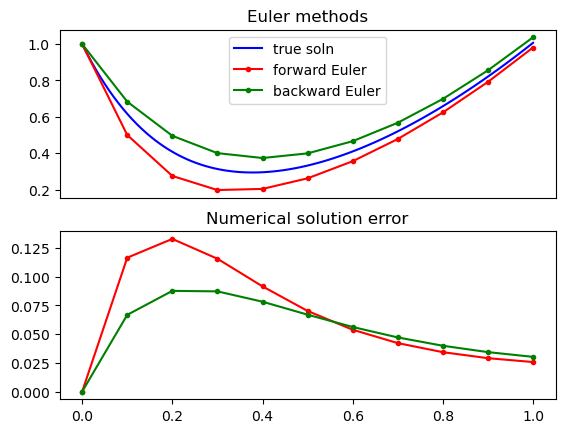

In [5]:
tt = range(a, b, length=100)

subplot(2, 1, 1)
plot(tt, y.(tt), label="true soln", "b")
plot(tout, yfe, "r.-", label="forward Euler")
plot(tout, ybe, "g.-", label="backward Euler")
xticks([])
title("Euler methods")
legend()

subplot(2, 1, 2)
plot(tout, abs.(yfe - y.(tout)), "r.-")
plot(tout, abs.(ybe - y.(tout)), "g.-")
title("Numerical solution error");

---

## Difference equation

The forward Euler method is

$$
y_{i+1} = y_i + h f(t_i, y_i)
$$

so we have the following **difference equation**, written in divided difference form:

$$
0 = \frac{y_{i+1} - y_i}{h} - f(t_i, y_i).
$$

---

# Local truncation error

The **local truncation error** $d_i$ is the amount that the exact solution $y(t)$ fails to satisfy this difference equation, so

$$
d_i = \frac{y(t_{i+1}) - y(t_i)}{h} - f(t_i, y(t_i)).
$$

Since

$$
y(t_{i+1}) = y(t_i) + h f(t_i, y(t_i)) + \frac{h^2}{2} y''(\xi_i),
$$

we have that 

$$
d_i = \frac{h}{2} y''(\xi_i) = O(h),
$$ 

so we say that the forward Euler method is **first order accurate**.

In [6]:
N = 100000

for i = 1:4
    h = (b - a)/N
    tout, yfe = euler(f, a, b, y0, N)
    err = maximum(abs.(yfe - y.(tout)))
    @show (h, err)
    N *= 10
end


(h, err) = (1.0e-5, 1.0490088337755665e-5)
(h, err) = (1.0e-6, 1.0489908020550054e-6)
(h, err) = (1.0e-7, 1.0489887353193339e-7)
(h, err) = (1.0e-8, 1.0489850710282411e-8)


---

## Global error

The **global error** is

$$
e_i = y(t_i) - y_i, \quad i = 0, 1, \ldots, N-1.
$$

Then we have

$$
\begin{align}
d_i - 0 
&= \paren{\frac{y(t_{i+1}) - y(t_i)}{h} - f(t_i, y(t_i))} - \paren{\frac{y_{i+1} - y_i}{h} - f(t_i, y_i)}\\
&= \frac{[y(t_{i+1}) - y_{i+1}] - [y(t_i) - y_i]}{h} - [f(t_i, y(t_i)) - f(t_i, y_i)]\\
&= \frac{e_{i+1} - e_i}{h} - [f(t_i, y(t_i)) - f(t_i, y_i)].\\
\end{align}
$$

Thus,

$$
\begin{align}
\abs{e_{i+1}}
&= \abs{e_i + h[f(t_i, y(t_i)) - f(t_i, y_i)] + hd_i} \\
&\leq \abs{e_i} + h\abs{f(t_i, y(t_i)) - f(t_i, y_i)} + h\abs{d_i} \\
&\leq \abs{e_i} + h\abs{f(t_i, y(t_i)) - f(t_i, y_i)} + hd,
\end{align}
$$

where we define 

$$
\abs{d_i} = \frac{h}{2} \abs{y''(\xi_i)} \leq 
\frac{h}{2}\norm{y''} =: d.
$$

---

## Lipschitz continuity

We say that $f(t,y)$ is **Lipschitz continuous** in $y$ with **Lipschitz constant** $L$ if

$$
\abs{f(t,y) - f(t,\hat{y})} \leq L \abs{y - \hat{y}}, \quad a \leq t \leq b, \quad -\infty < y, \hat{y} < \infty.
$$

Under this condition on $f(t,y)$, we have

$$
\begin{align}
\abs{e_{i+1}}
&\leq \abs{e_i} + h\abs{f(t_i, y(t_i)) - f(t_i, y_i)} + hd \\
&\leq \abs{e_i} + hL\abs{y(t_i) - y_i} + hd\\
&\leq (1 + hL)\abs{e_i} + hd.\\
\end{align}
$$

---

# Convergence

A method is said to **converge** if 

$$
\lim_{h \to 0} \max_i \abs{e_i} = 0.
$$

> ## Theorem: (Forward Euler Convergence)
>
> Suppose $f(t,y)$ has bounded partial derivatives in the region
>
> $$\mathcal{D} = \set{(t,y) \mid  a \leq t \leq b, \abs{y} < \infty}.$$ 
>
> Then $f(t,y)$ is Lipschitz continuous in $y$ on the region $\mathcal{D}$ with some Lipschitz constant $L$ and
>
> $$
\abs{e_i} \leq \frac{h\norm{y''}}{2L} \brack{e^{L(t_i - a)} - 1}, \quad i=0,1,\ldots,N,
$$
>
> implying that the forward Euler method converges.

### Proof.

First we observe that

$$
\begin{align}
\abs{e_{i+1}} 
&\leq (1 + hL)\abs{e_i} + hd\\
&\leq hd\sum_{j=0}^i (1+hL)^j\\
&= hd \frac{(1+hL)^{i+1} - 1}{(1+hL) - 1}.\\
\end{align}
$$

---

\begin{align}
\abs{e_{i+1}} &\leq (1 + hL)\abs{e_i} + hd\\
              &\leq (1 + hL)\big( (1 + hL)\abs{e_{i-1}} + hd \big) + hd\\
              &\leq (1 + hL)^2\abs{e_{i-1}} + (1 + hL)hd + hd\\
              &\leq (1 + hL)^3\abs{e_{i-2}} + (1 + hL)^2hd + (1 + hL)hd + hd\\
              &\vdots \\
              &\leq (1 + hL)^{i+1}\abs{e_{0}} + (1 + hL)^ihd + \cdots + (1 + hL)^2hd + (1 + hL)hd + hd\\
              &= (1 + hL)^ihd + \cdots + (1 + hL)^2hd + (1 + hL)hd + (1 + hL)^0hd\\
              &= \sum_{j=0}^i (1 + hL)^jhd\\
              &= hd \sum_{j=0}^i (1 + hL)^j\\
\end{align}

---

Note that this last inequality is due to the geometric series formula

$$
\sum_{k=0}^{n-1} r^k = \frac{r^n - 1}{r - 1}.
$$

$$
|e_{i+1}| \leq hd \frac{(1+hL)^{i+1} - 1}{(1+hL) - 1}
$$

Thus,

$$
\begin{align}
\abs{e_{i+1}} 
&\leq \frac{d}{L} \brack{(1+hL)^{i+1} - 1}\\
&= \frac{d}{L} \brack{ \paren{1+\frac{hL(i+1)}{i+1} }^{i+1} - 1}\\
&\leq \frac{d}{L} \brack{ e^{hL(i+1)} - 1},\\
\end{align}
$$

which is due to the exponential formula

$$
e^x = \lim_{n \to \infty} \paren{1 + \frac{x}{n}}^n.
$$

Therefore,

$$
\abs{e_{i+1}} \leq \frac{h\norm{y''}}{2L} \brack{ e^{L(t_{i+1} - a)} - 1},
$$

since $h(i+1) = t_{i+1} - a$. $\blacksquare$

---